Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5648688.85it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1051178.38it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8384585.74it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6774725.74it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 60000/60000 [18:06<00:00, 55.24it/s]


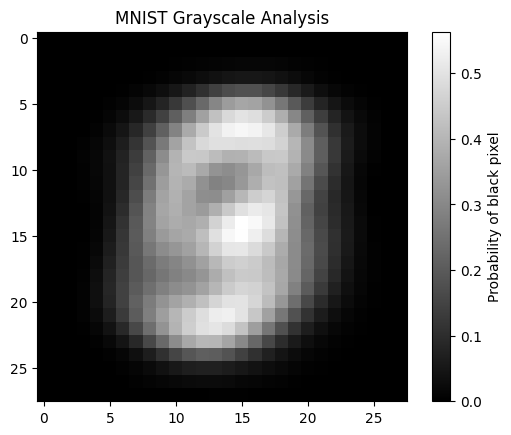

In [ ]:
import torchvision
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Set up the transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
batch_size = 60000
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Get the first batch
for x in trainloader:
    break

# Initialize the pixel counter dictionary
pixel_counts = {}
for i in range(28):
    for j in range(28):
        pixel_counts[(i, j)] = 0

# Count black pixels
for image_index in tqdm(range(batch_size)): #50 should be batch_size
    for i in range(28):
        for j in range(28):
            if x[0][image_index][0][i][j] > 0:  # Changed condition to > 0
                pixel_counts[(i, j)] += 1

# Create the grayscale image
grayscale_image = np.zeros((28, 28))
for i in range(28):
    for j in range(28):
        grayscale_value = pixel_counts[(i, j)] / batch_size #should be batch_size
        grayscale_image[i, j] = grayscale_value

# Display the resulting image
plt.imshow(grayscale_image, cmap='gray')
plt.title("MNIST Grayscale Analysis")
plt.colorbar(label='Probability of black pixel')
plt.show()

<ipython-input-6-1699eb192878>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


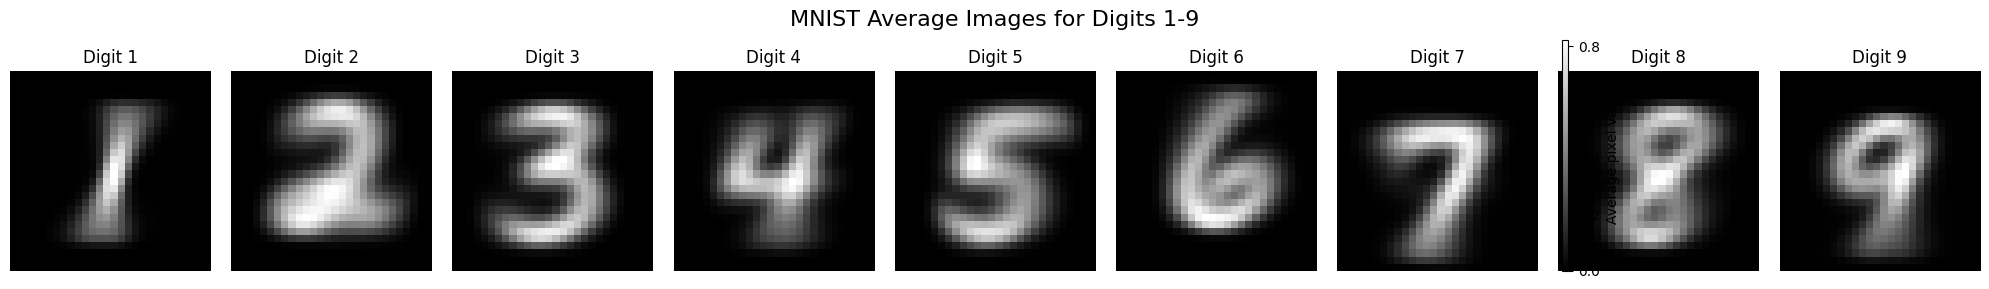

In [ ]:
import torchvision
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def display_digit_image(digit, ax=None):
    if digit not in range(10):
        print("Please enter a digit between 0 and 9.")
        return

    # Get the average image for the specified digit
    avg_image = average_images[digit].numpy()

    # Display the resulting image
    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(avg_image, cmap='gray')
    ax.set_title(f"Digit {digit}")
    ax.axis('off')
    return im

def display_all_digits():
    fig, axes = plt.subplots(1, 9, figsize=(20, 3))
    fig.suptitle("MNIST Average Images for Digits 1-9", fontsize=16)

    for digit, ax in zip(range(1, 10), axes):
        im = display_digit_image(digit, ax)

    # Add a colorbar that's shared by all subplots
    fig.colorbar(im, ax=axes.ravel().tolist(), label='Average pixel value', aspect=40)
    plt.tight_layout()
    plt.show()

# Call the function to display all digits
display_all_digits()